In [ ]:
import keras
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
data = keras.datasets.cifar10.load_data()

In [ ]:
(X_train, y_train), (X_test, y_test) = data

# Normalizing the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshaping data
y_train = y_train.reshape(-1, )
y_test = y_test.reshape(-1, )
X_train_flat = X_train.reshape(-1,3072)
X_test_flat = X_test.reshape(-1, 3072)

# Using only 5000 entries of data to make sure the computer does not crash
X_train_sub, _, y_train_sub, _ = train_test_split(
    X_train_flat, y_train, train_size=5000, random_state=42, stratify=y_train
)


In [ ]:
# SVM model
clf_svm = svm.SVC()
clf_svm.fit(X_train_sub, y_train_sub)

# Logistic Regression Model
clf_lr = LogisticRegression()
clf_lr.fit(X_train_sub, y_train_sub)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = clf_svm.predict(X_test_flat)
y_pred_lr = clf_lr.predict(X_test_flat)

Accuracy of the Logistic Regression Model: 0.3442
Accuracy of the SVM model: 0.442
F1 score of svm: 0.4367133660644138
F1 score of l1: 0.34150807484721973


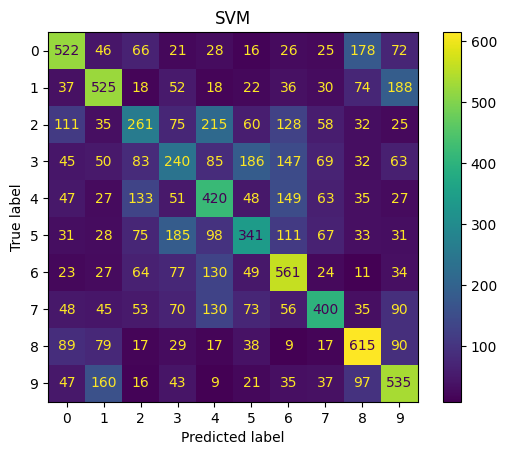

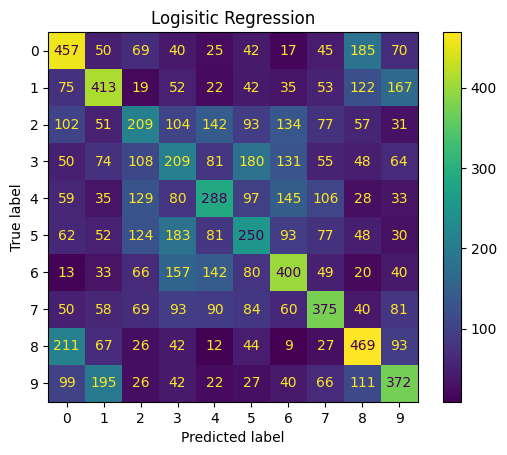

In [ ]:
# Computing the Accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_svm = accuracy_score(y_test, y_pred)

print("Accuracy of the Logistic Regression Model:", accuracy_lr)
print("Accuracy of the SVM model:", accuracy_svm)

# Computing F1 scores
f1_score_svm = f1_score(y_test, y_pred, average='weighted')
f1_score_lr = f1_score(y_test, y_pred_lr, average='weighted')

print("F1 score of svm:", f1_score_svm)
print("F1 score of l1:", f1_score_lr)

# Plotting the confusion matrix
confusion_matrix_svm = confusion_matrix(y_test, y_pred, labels=clf_svm.classes_)
confusion_matrix_lr = confusion_matrix(y_test, y_pred_lr, labels=clf_lr.classes_)

cm_svm = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_svm, display_labels=clf_svm.classes_)
cm_lr = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_lr, display_labels=clf_lr.classes_)

cm_svm.plot()
plt.title("SVM")

cm_lr.plot()
plt.title("Logisitic Regression")

plt.show()

As we can see, on comparing the testing evaluations we can conclusde that the SVM model works best in providing accurate resutls compared to the logistic regression model

In [ ]:
# Bonus

# Using only 5000 entries of data to make sure the computer does not crash
X_train_sub, _, y_train_sub, _ = train_test_split(
    X_train_flat, y_train, train_size=5000, random_state=42, stratify=y_train
)

# SVM with kernel = 'linear'
svm_linear = svm.SVC(kernel='linear')
svm_linear.fit(X_train_sub, y_train_sub)
y_pred_linear = svm_linear.predict(X_test_flat)

# SVM with kernel = 'poly'
svm_poly = svm.SVC(kernel='poly')
svm_poly.fit(X_train_sub, y_train_sub)
y_pred_poly = svm_poly.predict(X_test_flat)

# SVM with kernel = 'sigmoid'
svm_sig = svm.SVC(kernel='sigmoid')
svm_sig.fit(X_train_sub, y_train_sub)
y_pred_sig = svm_sig.predict(X_test_flat)

In [ ]:
print(classification_report(y_test, y_pred_linear))
print(classification_report(y_test, y_pred_poly))
print(classification_report(y_test, y_pred_sig))

              precision    recall  f1-score   support

           0       0.32      0.41      0.36      1000
           1       0.38      0.33      0.35      1000
           2       0.19      0.27      0.23      1000
           3       0.17      0.20      0.19      1000
           4       0.27      0.30      0.28      1000
           5       0.23      0.20      0.21      1000
           6       0.29      0.29      0.29      1000
           7       0.33      0.23      0.27      1000
           8       0.39      0.42      0.40      1000
           9       0.42      0.25      0.32      1000

    accuracy                           0.29     10000
   macro avg       0.30      0.29      0.29     10000
weighted avg       0.30      0.29      0.29     10000

              precision    recall  f1-score   support

           0       0.38      0.48      0.42      1000
           1       0.42      0.36      0.39      1000
           2       0.21      0.30      0.25      1000
           3       0.23 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


On comparing the results of the scores we can conlclude that the when the kernel is set to 'rbf' it provides the best results.

When the kernel is not specified it defaults to 'rbf'